# **Analisis Data Covid-19 Jakarta dan Indonesia**
*by Georhapsody | Submisi Data Science Academy Compfest 15*

# **Daftar Isi**

1.   [Pendahuluan](#Pendahuluan)
2.   [Rumusan Masalah](#Rumusan-Masalah)
3.   [Hipotesis](#Hipotesis)
4.   [Metodologi](#Metodologi)
5.   [Data Preparation](#Data-Preparation)
5.   [Data Profiling](#Data-Profiling)
7.   [Data Cleansing](#Data-Cleansing)
8.   [Exploratory Data Analysis](#Exploratory-Data-Analysis)
9.   [Feature Engineering](#Feature-Engineering)
10.  [Analisis Lanjutan](#Analisis-Lanjutan)
11.  [Kesimpulan dan Rekomendasi](#Kesimpulan-dan-Rekomendasi)

# **Pendahuluan**

Pandemi Covid-19 memberikan dampak yang besar pada berbagai lini kehidupan masyarakat. Untuk menangani pandemi ini, pemerintah di telah melakukan berbagai upaya, seperti membentuk gugus tugas dan memberlakukan pembatasan aktivitas masyarakat berskala nasional.

Meski telah dilakukan berbagai upaya, kita telah banyak mendengar jumlah masyarakat yang terinfeksi dan meninggal akibat Covid-19 masih sangat banyak. Selain itu, perekonomian dan tingkat mobilitas masyarakat juga terkena dampak buruk kebijakan pemerintah terhadap pandemi. 

Apakah kebijakan yang diambil pemerintah untuk menekan pandemi telah tepat? Apa saja efek akibat kebijakan seperti PPKM terhadap angka Covid-19, perekonomian, atau tingkat mobilitas masyarakat? Apakah kebijakan PPKM diberlakukan terlambat atau tepat waktu? Diperlukan analisis terhadap data-data untuk menjawab persoalan tersebut.

# **Rumusan Masalah**
1. Bagaimana tren angka Covid-19 di DKI Jakarta?
2. Bagaimana tren angka Covid-19 nasional?
3. Bagaimana efektivitas kebijakan PPKM dalam menekan angka Covid-19?
4. Bagaimana efek kebijakan PPKM Covid-19 terhadap PDB nasional?
5. Bagaimana efek kebijakan PPKM Covid-19 terhadap tingkat mobilitas masyarakat?

# **Hipotesis**
1. Kebijakan PPKM efektif dan tepat waktu ditandai dengan menurunnya angka Covid-19 tidak lama setelah diberlakukan.
2. Kebijakan PPKM berdampak negatif terhadap angka PDB nasional.
3. Kebijakan PPKM berdampak negatif pada tingkat mobilitas masyarakat.

# **Metodologi**

Sebelum dianalisis, dilakukan *preprocessing* data berupa *data preparation*, *data profiling*, dan *data cleansing*. Dalam menentukan hubungan antarvariabel serta menentukan pola dalam data, akan digunakan analisis statistik. Untuk menentukan pola serta prediksi pada, dibuat model regresi polinomial yang di-*fit* terhadap data. Agar akurasi model tinggi, dilakukan *feature engineering* pada data dan *hyperparameter tuning* model.

# **Data Preparation**

Dalam analisis ini digunakan *dataset* Covid-19, PDB, serta mobilitas nasional. Data telah diproses terlebih dahulu, seperti konversi ke .csv dan koreksi format data, sebelum dianalisis.

Seluruh *dataset* kemudian dimuat ke dalam *dataframe*. Kemudian ubah kolom tanggal sebagai *index*.

In [948]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from datetime import datetime
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Import data Covid-19
df_covid_raw = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/raw-covid-data.csv",
                          na_values="nan", keep_default_na=False)

# Import data PDB Indonesia
df_PDB_raw = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/raw-PDB-data.csv")

# Import data mobility Indonesia 2020, 2021, dan 2022
mob_2020 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2020_mobility_report.csv")
mob_2021 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2021_mobility_report.csv")
mob_2022 = pd.read_csv("https://raw.githubusercontent.com/reza-nugraha32/covid-19-analysis/main/dataset/2022_mobility_report.csv")
df_mobility_raw = pd.concat([mob_2020, mob_2021, mob_2022], axis=0)

In [949]:
# Set tahun-bulan sebagai index data PDB
df_PDB_raw = df_PDB_raw.set_index("tahun-bulan")

# Set tanggal sebagai index data mobility
df_mobility_raw = df_mobility_raw.set_index("date")

# **Data Profiling**

In [950]:
# Cetak 5 data Covid-19 paling bawah
df_covid_raw.tail()

,Tanggal,Positif (Indonesia),Dirawat (Indonesia),Sembuh (Indonesia),Meninggal (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),...,Positif Harian (Indonesia),Dirawat Harian (Indonesia),Sembuh Harian (Indonesia),Meninggal Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
1213,26/06/2023,,,,,"16,115","1,551,828",124,67,"1,568,134",...,0,0,0,0,0,25,-15,0,10,-15
1214,27/06/2023,,,,,"16,115","1,551,845",126,67,"1,568,153",...,0,0,0,0,0,17,2,0,19,2
1215,28/06/2023,,,,,"16,115","1,551,857",129,63,"1,568,164",...,0,0,0,0,0,12,3,-4,11,-1
1216,29/06/2023,,,,,"16,115","1,551,896",117,44,"1,568,172",...,0,0,0,0,0,39,-12,-19,8,-31
1217,30/06/2023,,,,,"16,115","1,551,920",106,42,"1,568,183",...,0,0,0,0,0,24,-11,-2,11,-13


Terdapat kesalahan format pada data Covid-19 yang harus diperbaiki.

In [951]:
# Cetak 5 data PDB paling bawah
df_PDB_raw.head()

,PDB_harga_konstan,perubahan_harga_konstan,PDB_harga_berlaku,perubahan_harga_berlaku
tahun-bulan,,,,
2019-03,2625180.5,-0.52,3782618.3,-0.44
2019-06,2735414.1,4.20,3964074.7,4.80
2019-09,2818812.7,3.05,4067358.0,2.61
2019-12,2769748.1,-1.74,4018606.2,-1.20
2020-03,2703027.1,-2.41,3923347.9,-2.37


In [952]:
# Cetak 5 data mobility paling bawah
df_mobility_raw.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,,
2020-02-15,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-2.0,-2.0,-8.0,1.0,5,1
2020-02-16,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-3.0,-7.0,-4.0,2,2
2020-02-17,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-4.0,-7.0,-1.0,3,1
2020-02-18,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-2.0,-4.0,1.0,2,1
2020-02-19,ID,Indonesia,NaN,NaN,NaN,NaN,NaN,ChIJtwRkSdcHTCwRhfStG-dNe-M,-3.0,-4.0,-3.0,0.0,1,1


Terdapat *missing values* untuk beberapa kolom data *mobility* karena beberapa data tersebut adalah agregat nasional, sehingga kolom seperti sub_region_1 (provinsi) bernilai *null*. 

In [953]:
# Cek datatypes data PDB
print("Datatypes data PDB")
print(df_PDB_raw.dtypes)

# Cek missing values data PDB
print("\nMissing values data PDB")
print(df_PDB_raw.isna().sum())

Datatypes data PDB
PDB_harga_konstan          float64
perubahan_harga_konstan    float64
PDB_harga_berlaku          float64
perubahan_harga_berlaku    float64
dtype: object

Missing values data PDB
PDB_harga_konstan          0
perubahan_harga_konstan    0
PDB_harga_berlaku          0
perubahan_harga_berlaku    0
dtype: int64


In [954]:
# Cek datatypes data mobility
print("Datatypes data mobility")
print(df_mobility_raw.dtypes)

# Cek missing values data Covid
print("\nMissing values data mobility")
print(df_mobility_raw.isna().sum())

Datatypes data mobility
country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                          float64
metro_area                                            float64
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline                 int64
residential_percent_change_from_baseline                int64
dtype: object

Missing values data mobility
country_region_code                                       0
coun

# **Data Cleansing**

Terdapat format data Covid-19 yang salah karena terdapat koma pada angka dan terbaca sebagai *string*, sehingga harus koma tersebut harus dihapus kemudian diubah menjadi type *integer*. Kemudian, *missing value* pada data_rekap perlu ditangani dengan diisi dengan nilai rata-ratanya. 

In [955]:
# Hapus koma pada data dan konversi data Covid-19 ke integer
df_covid_raw = df_covid_raw.astype(str)
df_covid_raw = df_covid_raw.apply(lambda x: x.str.replace(',', ''))
df_covid_raw = df_covid_raw.apply(pd.to_numeric, errors='ignore')

In [956]:
# Isi missing value dengan rata-rata
for column in df_covid_raw.columns:
    if df_covid_raw[column].isna().any():
        df_covid_raw[column].fillna(int(df_covid_raw[column].median()), 
                                    inplace=True)
print("Missing values pada data:")
print(df_covid_raw.isna().sum())

Missing values pada data:
Tanggal                            0
Positif (Indonesia)                0
Dirawat (Indonesia)                0
Sembuh (Indonesia)                 0
Meninggal (Indonesia)              0
Meninggal (Jakarta)                0
Sembuh (Jakarta)                   0
Self-Isolation (Jakarta)           0
Dirawat (Jakarta)                  0
Positif (Jakarta)                  0
Positif Aktif (Jakarta)            0
Positif Harian (Indonesia)         0
Dirawat Harian (Indonesia)         0
Sembuh Harian (Indonesia)          0
Meninggal Harian (Indonesia)       0
Meninggal Harian (Jakarta)         0
Sembuh Harian (Jakarta)            0
Self-Isolation Harian (Jakarta)    0
Dirawat Harian (Jakarta)           0
Positif Harian (Jakarta)           0
Positif Aktif Harian (Jakarta)     0
dtype: int64


Lalu, *extract* kolom data Covid-19 Jakarta dan nasional ke dalam *dataframe* masing-masing. Hapus akhiran *(Jakarta)* dan *(Indonesia)* untuk masing-masing *dataframe* serta ganti nama kolom positif harian ke positif_baru. *Drop* kolom Self-Isolation dan Dirawat pada data Jakarta dan kolom Dirawat pada data nasional karena tidak dibutuhkan.

In [957]:
# Inisiasi dataframe Covid-19 Jakarta
df_covid_jakarta = df_covid_raw.drop(columns=[item for item in df_covid_raw.columns if "Indonesia" in item])
df_covid_jakarta.columns = df_covid_jakarta.columns.str.lower()

# Hapus akhiran "(jakarta)" dari nama kolom
df_covid_jakarta.columns = [col.replace(" (jakarta)", "") for col in df_covid_jakarta.columns]

# Ganti nama kolom positif harian ke positif_baru
df_covid_jakarta =  df_covid_jakarta.rename(columns={"positif harian":"positif_baru"})

# Drop kolom berakhiran "Harian"
df_covid_jakarta = df_covid_jakarta.drop(columns=[item for item in df_covid_jakarta.columns if "harian" in item])

# Rename kolom "posisi aktif"
df_covid_jakarta =  df_covid_jakarta.rename(columns={"positif aktif":"positif_aktif"})

# Drop kolom self-isolation & dirawat
df_covid_jakarta = df_covid_jakarta.drop(columns=["self-isolation", "dirawat"])

In [958]:
# Inisiasi dataframe Covid-19 Nasional
df_covid_nasional = df_covid_raw.drop(columns=[item for item in df_covid_raw.columns if "Jakarta" in item])
df_covid_nasional.columns = df_covid_nasional.columns.str.lower()

# Hapus akhiran "(Indonesia)" dari nama kolom
df_covid_nasional.columns = [col.replace(" (indonesia)", "") for col in df_covid_nasional.columns]

# Rename kolom "positif harian"
df_covid_nasional =  df_covid_nasional.rename(columns={"positif harian":"positif_baru"})


# Drop kolom berakhiran "harian"
df_covid_nasional = df_covid_nasional.drop(columns=[item for item in df_covid_nasional.columns if "harian" in item])

# Rename kolom "posisi aktif"
df_covid_nasional =  df_covid_nasional.rename(columns={"positif aktif":"positif_aktif"})

# Drop kolom "dirawat"
df_covid_nasional = df_covid_nasional.drop(columns=["dirawat"])

Ubah format tanggal keduanya menjadi tahun-bulan-hari, kemudian *set* tanggal sebagai *index*.

In [959]:
# Ubah format tanggal data Jakarta ke tahun-bulan-hari 
for row in df_covid_jakarta.index:
    year = df_covid_jakarta.iloc[row, 0][6:10]
    month = df_covid_jakarta.iloc[row, 0][3:5]
    day = df_covid_jakarta.iloc[row, 0][0:2]
    df_covid_jakarta.iloc[row, 0]=year+"-"+month+"-"+day

df_covid_jakarta = df_covid_jakarta.set_index("tanggal")
df_covid_jakarta.head()

,meninggal,sembuh,positif,positif_aktif,positif_baru
tanggal,,,,,
2020-01-29,0,0,0,0,0
2020-03-01,0,0,0,0,0
2020-03-02,0,0,0,0,0
2020-03-03,1,0,3,2,3
2020-03-04,1,0,3,2,0


In [960]:
# Ubah format tanggal data nasional ke tahun-bulan-hari 
for row in df_covid_nasional.index:
    year = df_covid_nasional.iloc[row, 0][6:10]
    month = df_covid_nasional.iloc[row, 0][3:5]
    day = df_covid_nasional.iloc[row, 0][0:2]
    df_covid_nasional.iloc[row, 0]=year+"-"+month+"-"+day

df_covid_nasional = df_covid_nasional.set_index("tanggal")
df_covid_nasional.head()

,positif,sembuh,meninggal,positif_baru
tanggal,,,,
2020-01-29,0.0,0.0,0.0,0
2020-03-01,0.0,0.0,0.0,0
2020-03-02,2.0,0.0,0.0,2
2020-03-03,2.0,0.0,0.0,0
2020-03-04,2.0,0.0,0.0,0


Tambahkan kolom rasio_kematian, rasio_sembuh, rasio_sembuh_meninggal pada Covid-19 data Jakarta dan nasional

In [962]:
# Data Covid-19 Jakarta
# Tambahkan kolom rasio_kematian
df_covid_jakarta["rasio_kematian"] = df_covid_jakarta["meninggal"]/df_covid_jakarta["positif_aktif"]
df_covid_jakarta.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh
df_covid_jakarta["rasio_sembuh"] = df_covid_jakarta["sembuh"]/df_covid_jakarta["positif_aktif"]
df_covid_jakarta.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh_meninggal
df_covid_jakarta["rasio_sembuh_meninggal"] = df_covid_jakarta["sembuh"]/df_covid_jakarta["meninggal"]
df_covid_jakarta.fillna(0, inplace=True)

df_covid_jakarta.head()

,meninggal,sembuh,positif,positif_aktif,positif_baru,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,,,
2020-01-29,0,0,0,0,0,0.0,0.0,0.0
2020-03-01,0,0,0,0,0,0.0,0.0,0.0
2020-03-02,0,0,0,0,0,0.0,0.0,0.0
2020-03-03,1,0,3,2,3,0.5,0.0,0.0
2020-03-04,1,0,3,2,0,0.5,0.0,0.0


In [963]:
# Data Covid-19 nasional
# Tambahkan kolom rasio_kematian
df_covid_nasional["rasio_kematian"] = df_covid_nasional["meninggal"]/df_covid_nasional["positif"]
df_covid_nasional.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh
df_covid_nasional["rasio_sembuh"] = df_covid_nasional["sembuh"]/df_covid_nasional["positif"]
df_covid_nasional.fillna(0, inplace=True)

# Tambahkan kolom rasio_sembuh_meninggal
df_covid_nasional["rasio_sembuh_meninggal"] = df_covid_nasional["sembuh"]/df_covid_nasional["meninggal"]
df_covid_nasional.fillna(0, inplace=True)

df_covid_nasional.head()

,positif,sembuh,meninggal,positif_baru,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,,
2020-01-29,0.0,0.0,0.0,0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0,0.0,0.0,0.0
2020-03-02,2.0,0.0,0.0,2,0.0,0.0,0.0
2020-03-03,2.0,0.0,0.0,0,0.0,0.0,0.0
2020-03-04,2.0,0.0,0.0,0,0.0,0.0,0.0


*Extract* data *mobility* untuk Jakarta dan nasional. Lalu, hapus kolom yang tidak diperlukan dan hapus *_percent_change_from_baseline* dari nama kolom. 

In [964]:
# Inisiasi dataframe mobility Jakarta
df_mobility_jakarta = df_mobility_raw[df_mobility_raw["sub_region_1"] == "Jakarta"]
df_mobility_jakarta = df_mobility_jakarta.drop(columns=["country_region_code", "country_region", "sub_region_1", 
                                                        "sub_region_2", "metro_area", "iso_3166_2_code", 
                                                        "census_fips_code", "census_fips_code", "place_id"])

# Hapus akhiran "_percent_change_from_baseline" dari nama kolom
df_mobility_jakarta.columns = [col.replace("_percent_change_from_baseline", "") for col in df_mobility_jakarta.columns]
df_mobility_jakarta.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2020-02-15,2.0,3.0,16.0,5.0,6,0
2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
2020-02-18,-1.0,1.0,-3.0,3.0,3,1
2020-02-19,-1.0,-3.0,-2.0,3.0,3,1


In [965]:
# Inisiasi data mobility nasional
df_mobility_nasional = df_mobility_raw[df_mobility_raw["sub_region_1"].isna()]
df_mobility_nasional = df_mobility_nasional.drop(columns=["country_region_code", "country_region", "sub_region_1", 
                                                          "sub_region_2", "metro_area","iso_3166_2_code", 
                                                          "census_fips_code", "census_fips_code", "place_id"])

# Hapus akhiran "_percent_change_from_baseline"" dari nama kolom
df_mobility_nasional.columns = [col.replace("_percent_change_from_baseline", "") for col in df_mobility_nasional.columns]
df_mobility_nasional.tail()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
date,,,,,,
2022-10-11,9.0,27.0,38.0,-8.0,14,14
2022-10-12,12.0,30.0,46.0,-9.0,15,13
2022-10-13,10.0,27.0,38.0,-9.0,16,13
2022-10-14,12.0,29.0,37.0,-7.0,18,13
2022-10-15,10.0,29.0,29.0,-6.0,20,13


In [966]:
# Drop kolom yang mengandung harga_berlaku
df_PDB = df_PDB_raw.drop(columns=[item for item in df_PDB_raw.columns if "_harga_berlaku" in item])

df_PDB.head()

,PDB_harga_konstan,perubahan_harga_konstan
tahun-bulan,,
2019-03,2625180.5,-0.52
2019-06,2735414.1,4.20
2019-09,2818812.7,3.05
2019-12,2769748.1,-1.74
2020-03,2703027.1,-2.41


# **Exploratory Data Analysis**

In [967]:
# Deskripsi statistik data Covid-19 Jakarta
print(df_covid_jakarta.describe())

          meninggal        sembuh       positif  positif_aktif  positif_baru  \
count   1218.000000  1.218000e+03  1.218000e+03    1218.000000   1218.000000   
mean   10064.576355  7.872319e+05  8.081742e+05   10877.774220   1287.506568   
std     6122.653732  5.761494e+05  5.810582e+05   16945.910467   2186.642995   
min        0.000000  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%     3251.000000  1.617305e+05  1.801732e+05    1593.000000    127.000000   
50%    13560.500000  8.468705e+05  8.613790e+05    6336.500000    599.000000   
75%    15501.500000  1.362779e+06  1.393480e+06   12415.000000   1399.500000   
max    16115.000000  1.551920e+06  1.568183e+06  113138.000000  15825.000000   

       rasio_kematian  rasio_sembuh  rasio_sembuh_meninggal  
count     1218.000000   1218.000000             1218.000000  
mean         6.377083    516.331618               61.959353  
std         12.171212   1033.290109               28.979314  
min          0.000000      0.00

In [999]:
# Deskripsi statistik data Covid-19 Jakarta
print(df_covid_nasional.describe())

            positif        sembuh      meninggal  positif_baru  \
count  1.218000e+03  1.218000e+03    1218.000000  1.218000e+03   
mean   3.553586e+06  3.378026e+06   95165.112479  0.000000e+00   
std    2.585230e+06  2.532638e+06   65367.026116  3.378851e+05   
min    0.000000e+00  0.000000e+00       0.000000 -6.802514e+06   
25%    7.291225e+05  5.985225e+05   21763.250000  4.672500e+02   
50%    4.191729e+06  3.992726e+06  140551.000000  2.143000e+03   
75%    6.153142e+06  5.960102e+06  156878.750000  5.655250e+03   
max    6.802514e+06  6.626174e+06  161683.000000  6.801615e+06   

       rasio_kematian  rasio_sembuh  rasio_sembuh_meninggal  
count     1218.000000   1218.000000             1218.000000  
mean         0.032638      0.828374                     inf  
std          0.014118      0.242274                     NaN  
min          0.000000      0.000000                0.000000  
25%          0.025283      0.820498               27.535600  
50%          0.027205      0.9419

In [968]:
# Deskripsi statistik data PDB nasional
print(df_PDB.describe())

       PDB_harga_konstan  perubahan_harga_konstan
count       1.600000e+01                16.000000
mean        2.781414e+06                 0.813125
std         1.149328e+05                 2.611331
min         2.589769e+06                -4.190000
25%         2.708048e+06                -0.932500
50%         2.771408e+06                 0.705000
75%         2.826015e+06                 3.112500
max         2.988636e+06                 5.050000


In [969]:
# Deskripsi statistik data PDB Jakarta
print(df_PDB.describe())

       PDB_harga_konstan  perubahan_harga_konstan
count       1.600000e+01                16.000000
mean        2.781414e+06                 0.813125
std         1.149328e+05                 2.611331
min         2.589769e+06                -4.190000
25%         2.708048e+06                -0.932500
50%         2.771408e+06                 0.705000
75%         2.826015e+06                 3.112500
max         2.988636e+06                 5.050000


In [970]:
# Deskripsi statistik data mobility Jakarta
print(df_mobility_jakarta.describe())

       retail_and_recreation  grocery_and_pharmacy       parks  \
count             974.000000            974.000000  974.000000   
mean              -24.090349             -2.964066  -37.136550   
std                14.343820             11.471478   25.951073   
min               -68.000000            -46.000000  -96.000000   
25%               -32.000000            -10.000000  -55.000000   
50%               -23.000000             -2.000000  -42.000000   
75%               -13.000000              5.000000  -16.250000   
max                10.000000             34.000000   31.000000   

       transit_stations  workplaces  residential  
count        974.000000  974.000000   974.000000  
mean         -35.632444  -25.191992    11.009240  
std           14.612164   16.135446     5.479563  
min          -79.000000  -82.000000    -1.000000  
25%          -44.000000  -34.000000     7.000000  
50%          -35.000000  -26.000000    10.000000  
75%          -25.000000  -14.000000    14.000000

In [971]:
# Deskripsi statistik data mobility nasional
print(df_mobility_nasional.describe())

       retail_and_recreation  grocery_and_pharmacy       parks  \
count             974.000000            974.000000  974.000000   
mean               -6.388090             13.425051    2.939425   
std                16.438596             17.822640   30.412671   
min               -53.000000            -34.000000  -58.000000   
25%               -18.000000             -1.000000  -17.000000   
50%                -7.000000             16.000000   -5.000000   
75%                 8.000000             28.000000   17.000000   
max                45.000000             74.000000  214.000000   

       transit_stations  workplaces  residential  
count        974.000000  974.000000   974.000000  
mean         -24.718686  -13.134497    10.186858  
std           15.855622   18.874753     4.602157  
min          -68.000000  -73.000000     0.000000  
25%          -35.000000  -25.000000     6.000000  
50%          -26.000000  -15.000000    10.000000  
75%          -12.000000    1.000000    14.000000

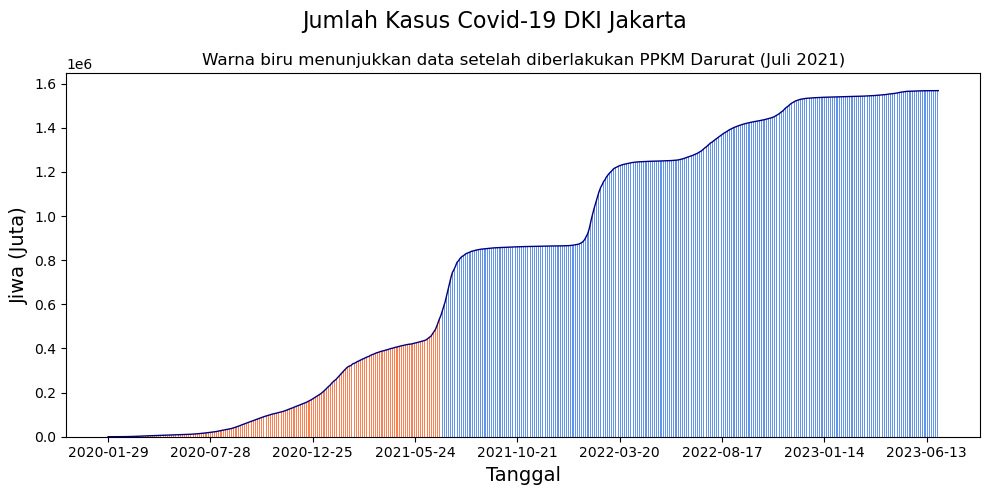

In [972]:
# Plot angka Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Kasus Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["positif"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "positif"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "positif"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

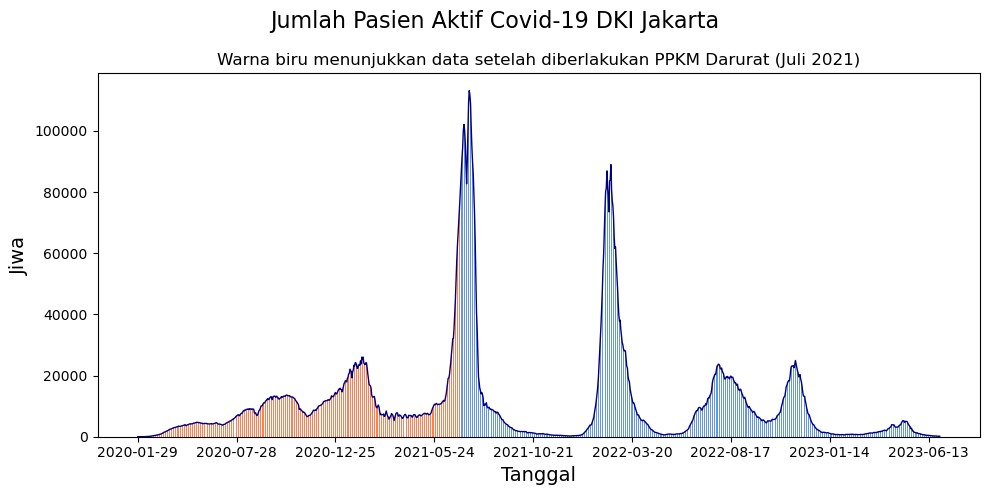

In [973]:
# Plot angka pasien aktif Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Aktif Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["positif_aktif"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "positif_aktif"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "positif_aktif"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

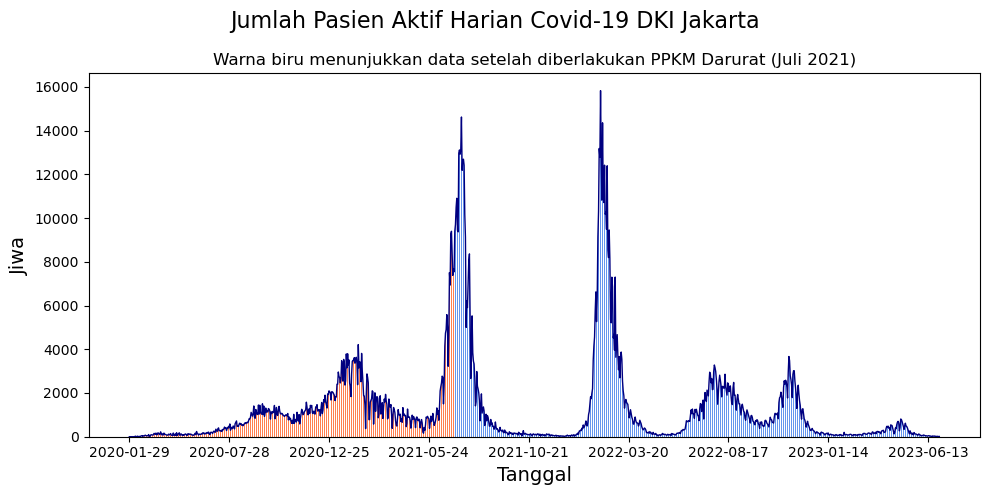

In [974]:
# Plot angka penambahan pasien aktif Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Aktif Harian Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["positif_baru"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "positif_baru"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "positif_baru"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

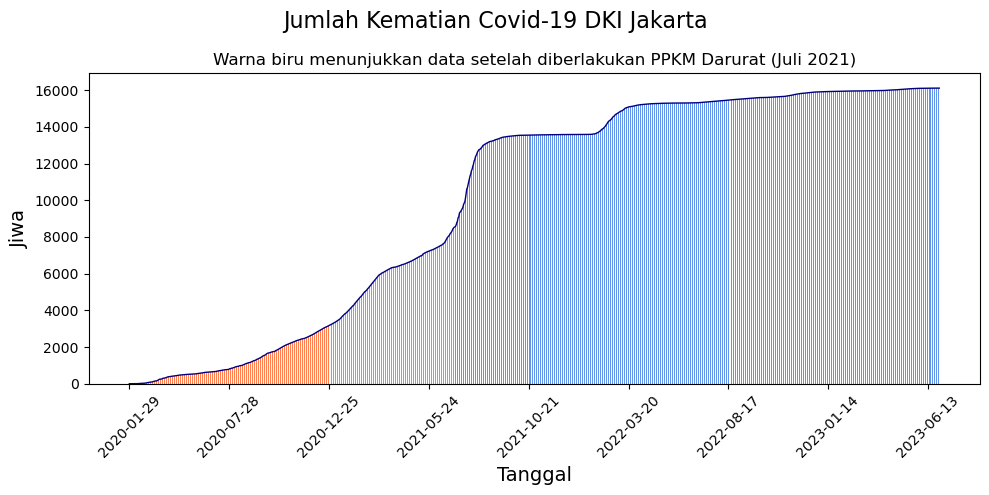

In [975]:
# Plot angka kematian Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Kematian Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["meninggal"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "meninggal"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "meninggal"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

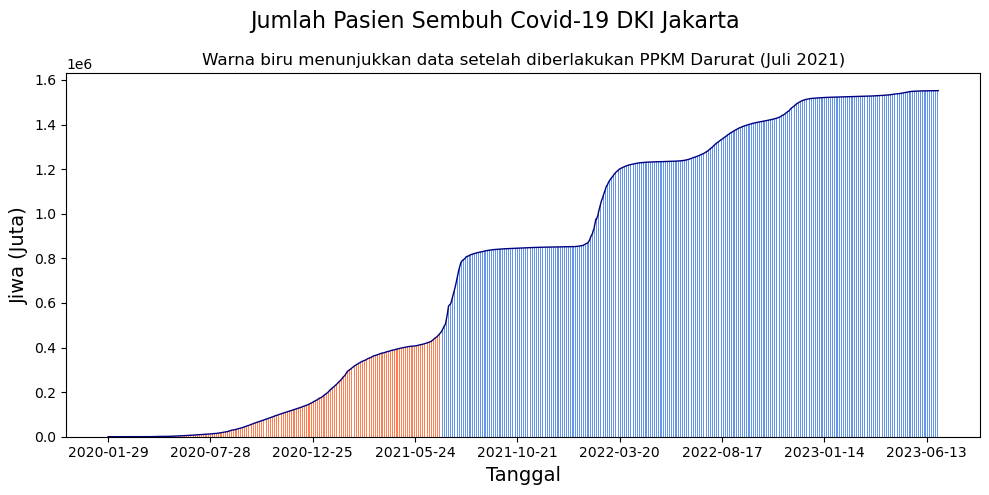

In [976]:
# Plot angka pasien sembuh Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Sembuh Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["sembuh"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "sembuh"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "sembuh"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

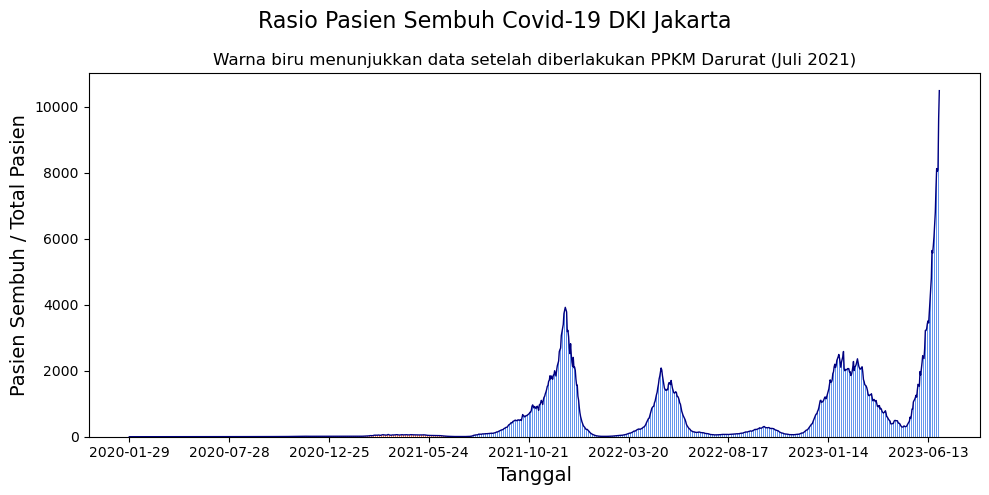

In [977]:
# Plot rasio pasien sembuh Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["rasio_sembuh"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "rasio_sembuh"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "rasio_sembuh"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

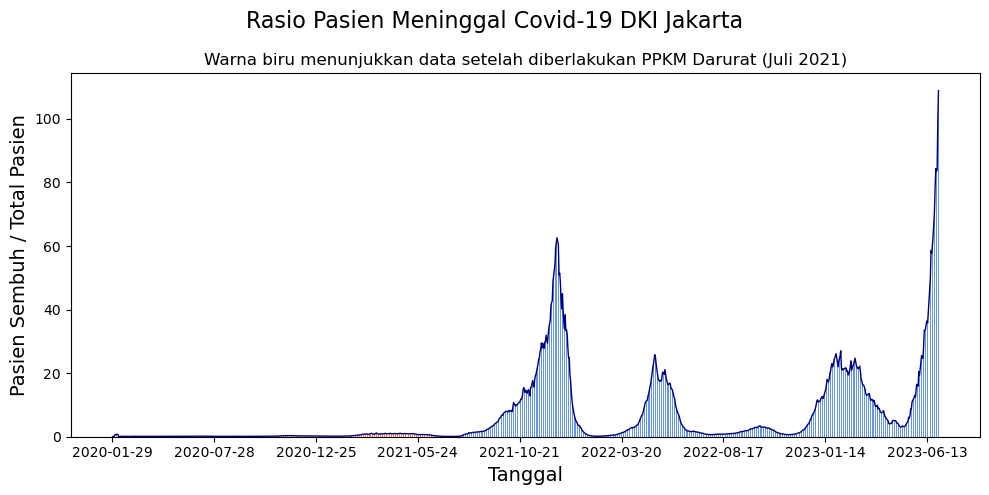

In [978]:
# Plot rasio pasien meninggal Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Meninggal Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["rasio_kematian"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "rasio_kematian"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "rasio_kematian"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

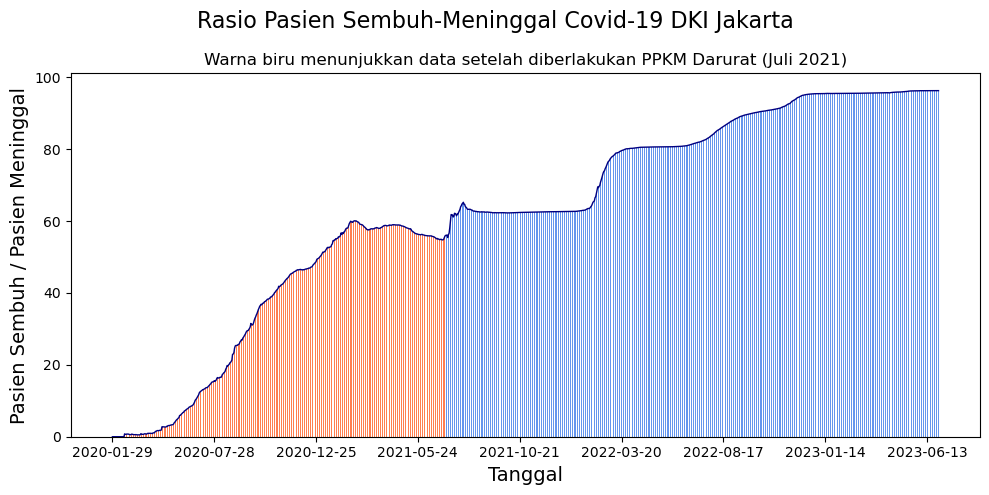

In [979]:
# Plot rasio pasien sembuh-meninggal Covid-19 Jakarta
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh-Meninggal Covid-19 DKI Jakarta", fontsize=16, ha="center")
ax.plot(df_covid_jakarta.index, df_covid_jakarta["rasio_sembuh_meninggal"], color="navy", lw=1)
ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index <= "2021-07-03", "rasio_sembuh_meninggal"].to_list(), 
        color="coral", width=0.5)

ax.bar(df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03"].index.to_list(), 
        df_covid_jakarta.loc[df_covid_jakarta.index >= "2021-07-03", "rasio_sembuh_meninggal"].to_list(),
        color="cornflowerblue", width=0.5)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Pasien Meninggal", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

In [1005]:
df_covid_nasional.tail(50)

,positif,sembuh,meninggal,positif_baru,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,,
2023-05-12,6795221.0,6614729.0,161574.0,1471,0.023778,0.973438,40.939316
2023-05-13,6796466.0,6616325.0,161599.0,1245,0.023777,0.973495,40.942859
2023-05-14,6797336.0,6617548.0,161609.0,870,0.023775,0.973550,40.947893
2023-05-15,6798097.0,6619790.0,161630.0,761,0.023776,0.973771,40.956444
2023-05-16,6798736.0,6620545.0,161638.0,639,0.023775,0.973791,40.959088
2023-05-17,6799760.0,6621556.0,161646.0,1024,0.023772,0.973793,40.963315
2023-05-18,6800425.0,6622467.0,161653.0,665,0.023771,0.973831,40.967177
2023-05-19,3553585.0,3378025.0,95165.0,-6800425,0.026780,0.950596,35.496506
2023-05-20,6801615.0,6624237.0,161671.0,6801615,0.023770,0.973921,40.973564


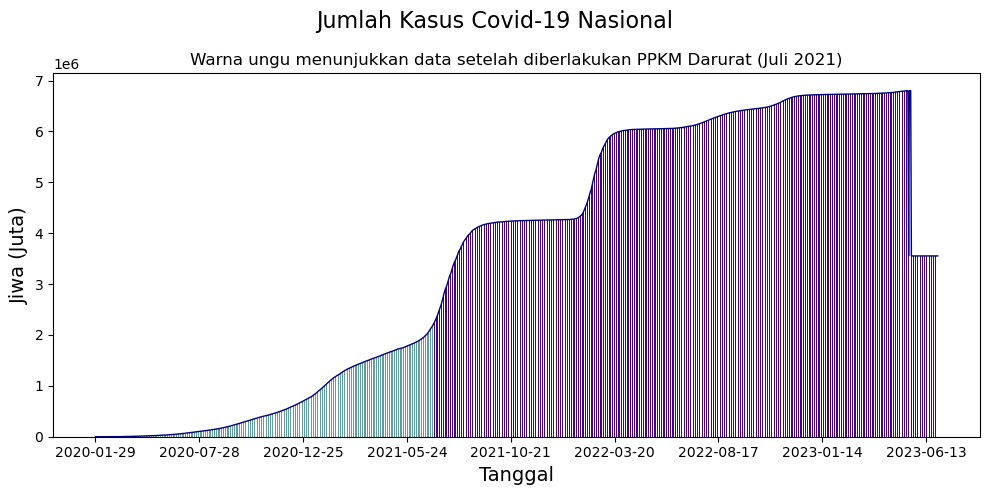

In [992]:
# Plot angka Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Kasus Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["positif"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "positif"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "positif"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

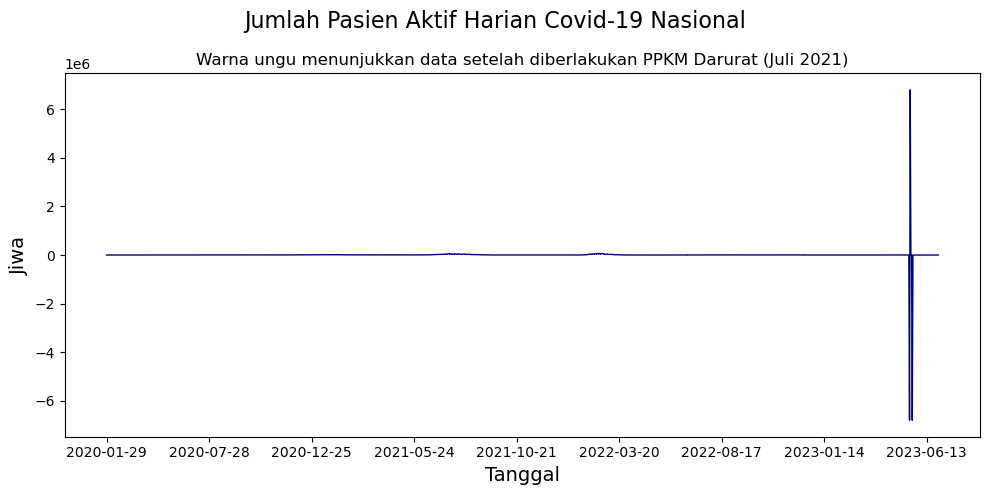

In [1000]:
# Plot angka pasien aktif harian Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Aktif Harian Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["positif_baru"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "positif_baru"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "positif_baru"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

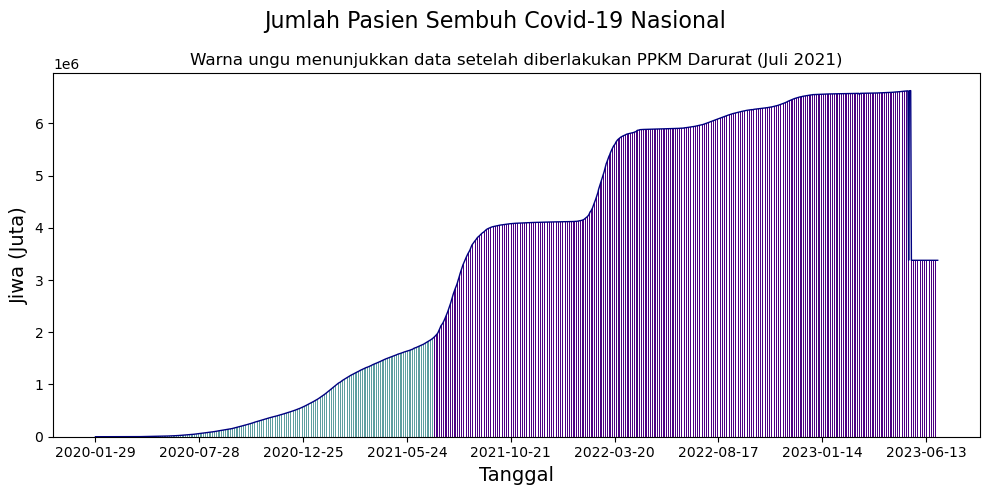

In [994]:
# Plot angka pasien sembuh Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Sembuh Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["sembuh"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "sembuh"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "sembuh"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa (Juta)", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

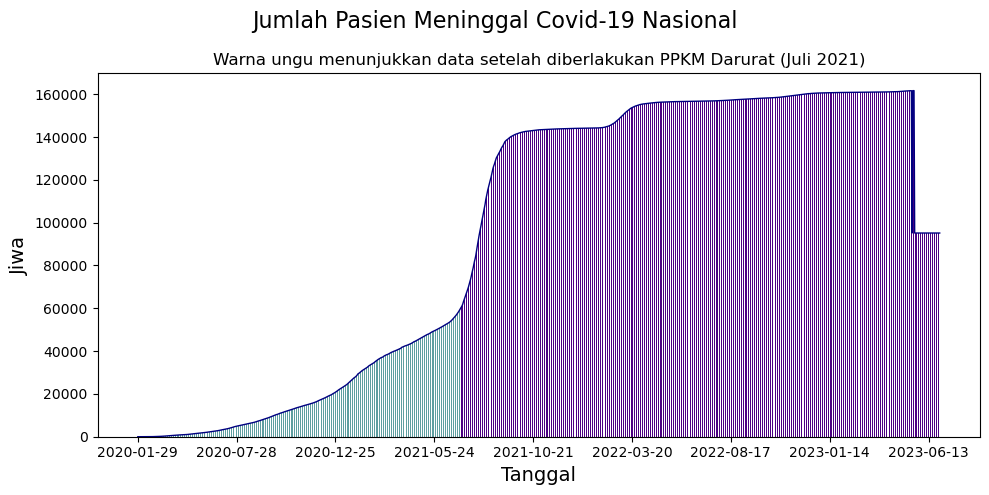

In [995]:
# Plot angka pasien meninggal Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Jumlah Pasien Meninggal Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["meninggal"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "meninggal"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "meninggal"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Jiwa", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

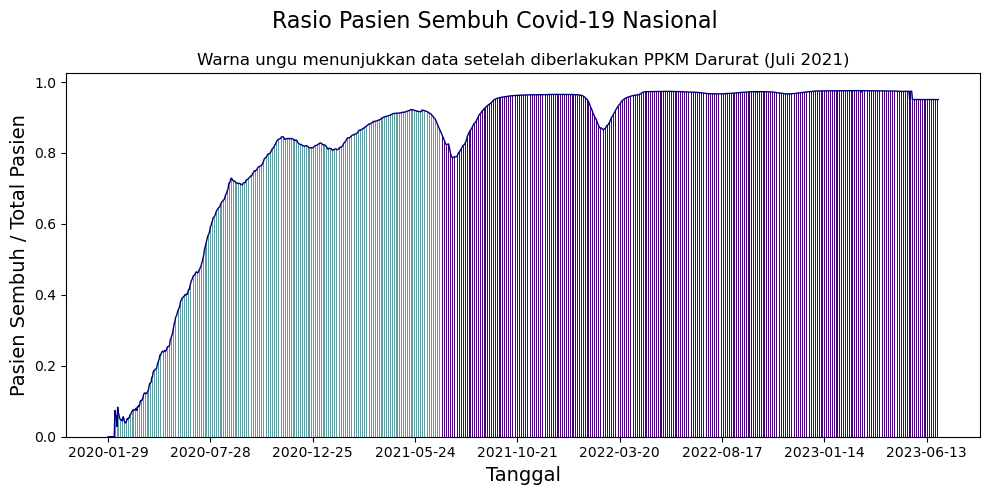

In [996]:
# Plot rasio pasien sembuh Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["rasio_sembuh"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "rasio_sembuh"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "rasio_sembuh"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Sembuh / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

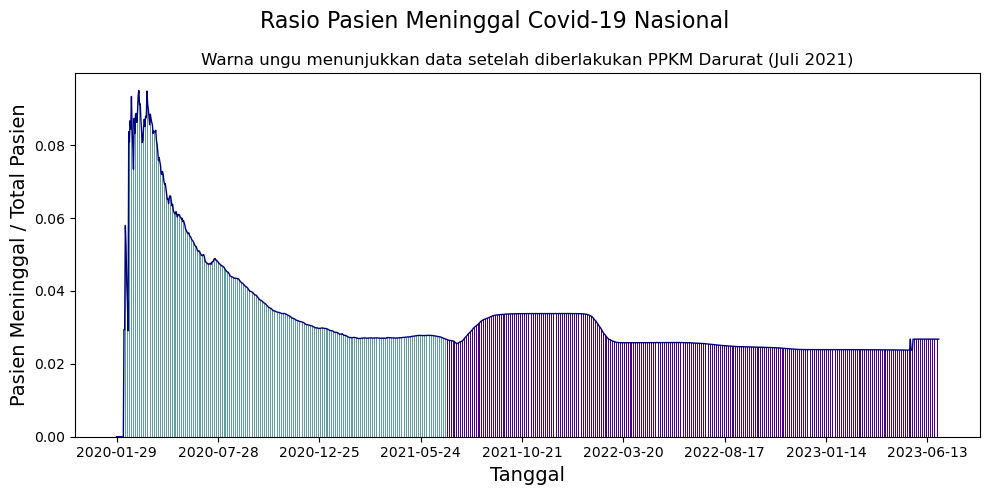

In [997]:
# Plot rasio pasien meninggal Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Meninggal Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["rasio_kematian"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "rasio_kematian"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "rasio_kematian"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Meninggal / Total Pasien", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

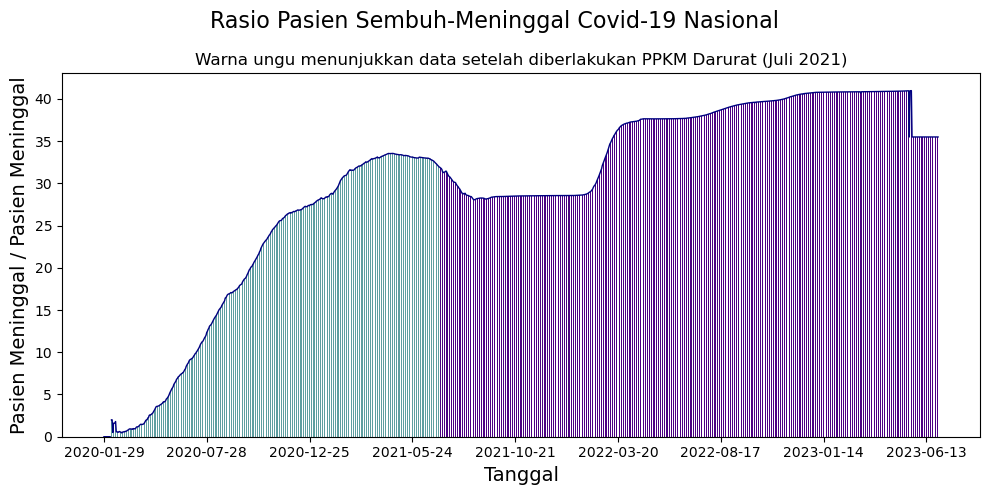

In [998]:
# Plot rasio pasien sembuh-meninggal Covid-19 nasional
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Rasio Pasien Sembuh-Meninggal Covid-19 Nasional", fontsize=16, ha="center")
ax.plot(df_covid_nasional.index, df_covid_nasional["rasio_sembuh_meninggal"], color="navy", lw=1)
ax.bar(df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index <= "2021-07-03", "rasio_sembuh_meninggal"].to_list(), 
        color="cadetblue", width=0.5)

ax.bar(df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03"].index.to_list(), 
        df_covid_nasional.loc[df_covid_nasional.index >= "2021-07-03", "rasio_sembuh_meninggal"].to_list(),
        color="indigo", width=0.5)

ax.set_title("Warna ungu menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tanggal", fontsize=14)
ax.set_ylabel("Pasien Meninggal / Pasien Meninggal", fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.tight_layout()
plt.show()

In [989]:
df_covid_nasional.head(20)

,positif,sembuh,meninggal,positif_baru,rasio_kematian,rasio_sembuh,rasio_sembuh_meninggal
tanggal,,,,,,,
2020-01-29,0.0,0.0,0.0,0,0.000000,0.000000,0.000000
2020-03-01,0.0,0.0,0.0,0,0.000000,0.000000,0.000000
2020-03-02,2.0,0.0,0.0,2,0.000000,0.000000,0.000000
2020-03-03,2.0,0.0,0.0,0,0.000000,0.000000,0.000000
2020-03-04,2.0,0.0,0.0,0,0.000000,0.000000,0.000000
2020-03-05,2.0,0.0,0.0,0,0.000000,0.000000,0.000000
2020-03-06,4.0,0.0,0.0,2,0.000000,0.000000,0.000000
2020-03-07,4.0,0.0,0.0,0,0.000000,0.000000,0.000000
2020-03-08,6.0,0.0,0.0,2,0.000000,0.000000,0.000000


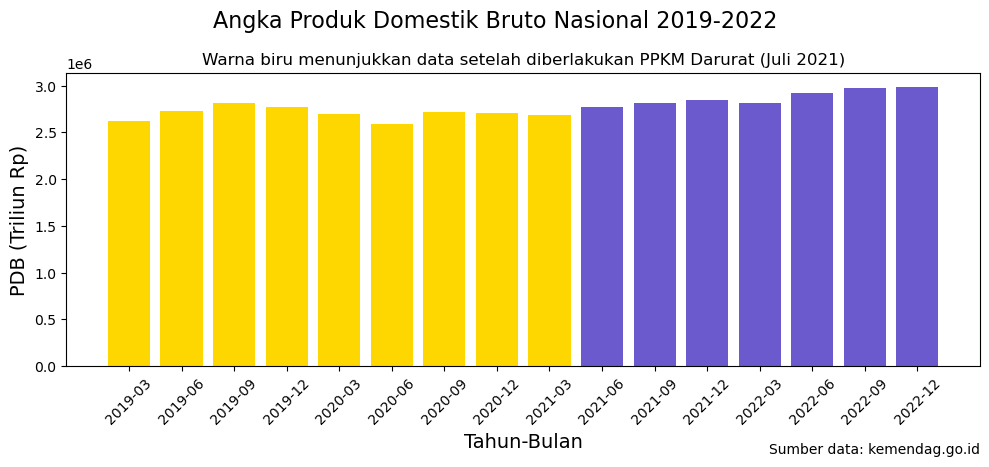

In [990]:
# Plot angka PDB 2019-2022
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Angka Produk Domestik Bruto Nasional 2019-2022", fontsize=16, ha="center")

ax.bar(df_PDB.loc[df_PDB.index <= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index <= "2021-06", "PDB_harga_konstan"].to_list(), 
        color="gold", 
        lw=2)

ax.bar(df_PDB.loc[df_PDB.index >= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index >= "2021-06", "PDB_harga_konstan"].to_list(),
        color="slateblue",
        lw=2)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha="center")
ax.set_xlabel("Tahun-Bulan", fontsize=14)
ax.set_ylabel("PDB (Triliun Rp)", fontsize=14)
plt.text(1, -0.3, "Sumber data: kemendag.go.id",
        ha="right", transform=ax.transAxes)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

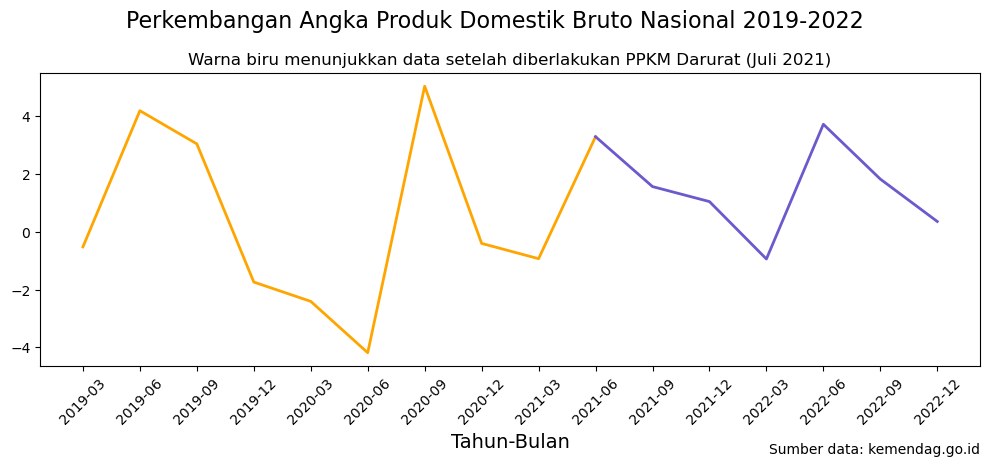

In [991]:
# Plot perkembangan PDB 2019-2022
# Plot angka PDB 2019-2022
fig, ax = plt.subplots(figsize=(10,5))
fig.suptitle("Perkembangan Angka Produk Domestik Bruto Nasional 2019-2022", fontsize=16, ha='center')
ax.plot(df_PDB.loc[df_PDB.index <= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index <= "2021-06", "perubahan_harga_konstan"].to_list(), 
        color="orange", 
        lw=2)

ax.plot(df_PDB.loc[df_PDB.index >= "2021-06"].index.to_list(), 
        df_PDB.loc[df_PDB.index >= "2021-06", "perubahan_harga_konstan"].to_list(),
        color="slateblue",
        lw=2)

ax.set_title("Warna biru menunjukkan data setelah diberlakukan PPKM Darurat (Juli 2021)",
             fontsize=12, ha='center')
ax.set_xlabel("Tahun-Bulan", fontsize=14)

plt.text(1, -0.3, "Sumber data: kemendag.go.id",
        ha="right", transform=ax.transAxes)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Feature Engineering**